In [6]:
import os
import nibabel as nib
from nilearn import image

In [7]:
data_location = "/media/moemen/Stuff/project/data/ds003643-download/derivatives/sub-EN057/func"

In [8]:
sample_location = os.path.join(data_location, "sub-EN057_task-lppEN_run-15_space-MNIColin27_desc-preproc_bold.nii.gz")

In [9]:
full_data = nib.load(sample_location)

In [10]:
full_data.shape

(73, 90, 74, 282)

In [11]:
full_data.affine

array([[   2.,   -0.,   -0.,  -72.],
       [  -0.,    2.,   -0., -106.],
       [   0.,    0.,    2.,  -64.],
       [   0.,    0.,    0.,    1.]])

In [12]:
sample_data = full_data.get_fdata()[:,:,:,100]

In [13]:
sample_data.shape

(73, 90, 74)

Text(0.5, 1.0, 'Axial')

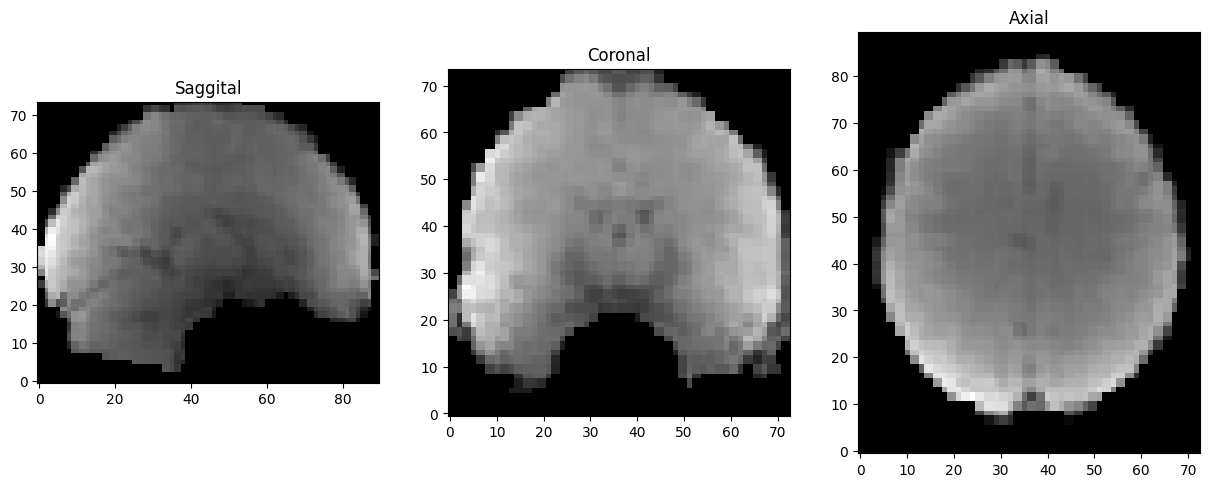

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1,3, figsize=(15,35))
axes = np.ravel(axes)

axes[0].imshow(sample_data[32,:,:].T, cmap='gray', origin='lower') # Saggital
axes[0].set_title("Saggital")
axes[1].imshow(sample_data[:,50,:].T, cmap='gray', origin='lower') # Coronal
axes[1].set_title("Coronal")
axes[2].imshow(sample_data[:,:,50].T, cmap='gray', origin='lower') # Axial
axes[2].set_title("Axial")

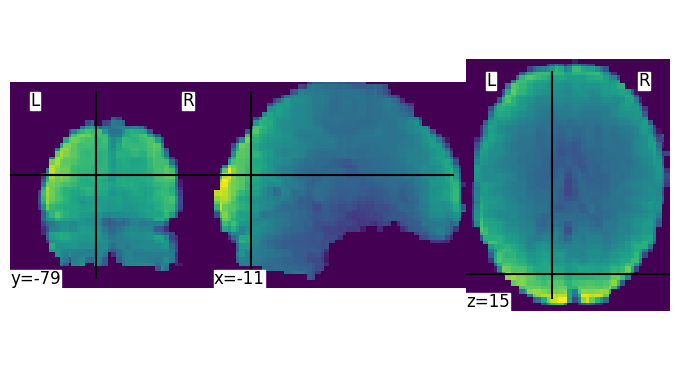

In [16]:
from nilearn import plotting

sample_nifti = nib.Nifti1Image(sample_data, affine=full_data.affine)
plotting.plot_img(sample_nifti)

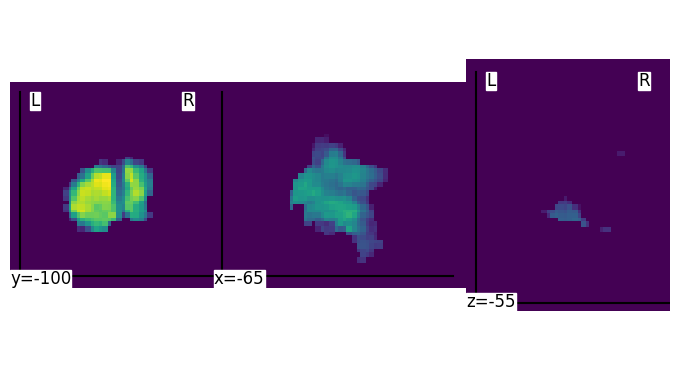

In [17]:
plotting.plot_img(sample_nifti, cut_coords=[-65, -100, -55])

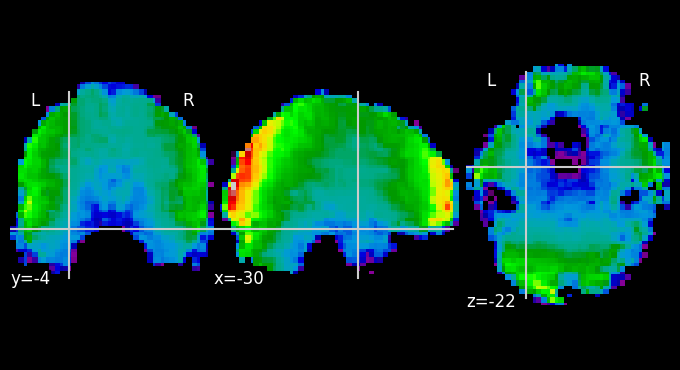

In [18]:
plotting.plot_epi(sample_nifti, cut_coords=[-30, -4, -22])

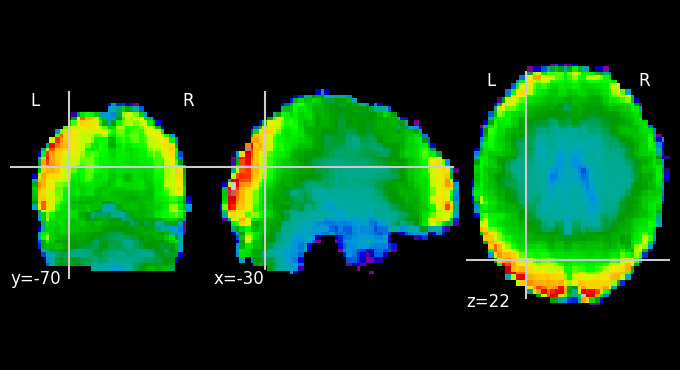

In [19]:
plotting.plot_epi(sample_nifti, cut_coords=[-30, -70, 22])

In [20]:
def plot_voxel_seq(data, x,y,z, t, nilearn_viz=False):
    bold_sequence = data.get_fdata()[x,y,z,:]
    slice = nib.Nifti1Image(data.get_fdata()[:,:,:,t], data.affine)
    fig, axis = plt.subplots(figsize=(10,5))
    plt.plot(bold_sequence, c='r')
    axis.set_ylabel('BOLD Response')
    axis.set_xlabel('Time')
    axis.set_title(f'BOLD Sequence at voxel {x,y,z}')

    if nilearn_viz:
        x2, y2, z2 = image.coord_transform(x,y,z, data.affine)
        plotting.plot_img(slice, cut_coords=[x2,y2,z2])

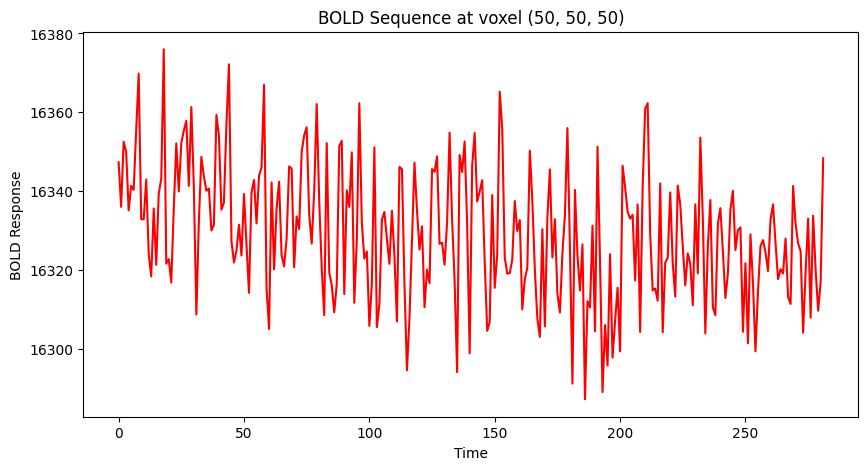

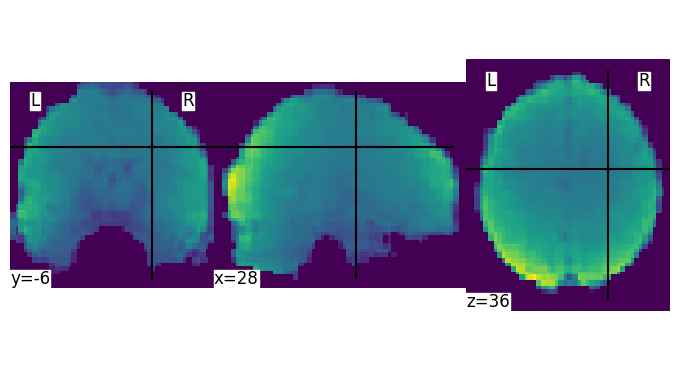

In [21]:
plot_voxel_seq(full_data, x=50, y=50, z=50, t = 10, nilearn_viz=True)